In [1]:
cd demo

[Errno 2] No such file or directory: 'demo'
/Users/annabell/UofU/Sigman/python-modeling/demo


In [2]:
from visualize import visualize
from reading_data import read_excel_file

# Get data using read_excel_file.py

In [3]:
read_methods = read_excel_file()

In [4]:
header_col = 5
rows_start = 0
rows_stop = 24
cols_start = 2
cols_stop = 24

In [5]:
read_methods.read_excel_file("../model_oct_bothsubs"+".xlsx", "bubbleplot", header_col, rows_start, rows_stop, cols_start, cols_stop)

In [6]:
my_dataframe = read_methods.df.copy()
my_dataframe.head()

,s2_1h_%yield,s2_3.5h_%yield(avg),s2_21h_%yield,s4_1h_%yield,s4_3.5h_%yield(avg),s4_21h_%yield,virtual,nbo_N_oxamide_max,nbo_aryl_sub_=O_max_max
0,18,55.500000,92,6,27.666667,69,0,-0.59232,-0.89851
1,9,36.333333,92,6,27.000000,65,0,-0.58780,-0.90730
2,6,19.666667,73,2,11.333333,57,0,-0.57818,-0.90199
3,17,57.666667,89,7,35.500000,61,0,-0.59187,-0.89612
4,8,48.333333,83,3,21.333333,55,0,-0.59182,-0.90570


# Visualize

In [7]:
visualize_methods = visualize(my_dataframe)

## Feature Selection For Plots

While I recommend using the pre-processing class to do feature exclusion, etc, for conventience I added some functions here too.

### R^2 Threshold 

I think the r^2 threshold feature is particularly useful...and was requested ;) 

In [8]:
visualize_methods.set_rsq_threshold(2)

You can also undo this if you want, going back to no threshold 

In [9]:
visualize_methods.reset_rsq_threshold()

### include features
This method excludes all features not in this list.
It's is particularly useful if you don't want to pass in a big list of parameters into the plot functions. 

In [10]:
visualize_methods.inlude_features(list(my_dataframe.columns)[0:5])

columns in['s2_1h_%yield', 's2_3.5h_%yield(avg)', 's2_21h_%yield', 's4_1h_%yield', 's4_3.5h_%yield(avg)'] will be the only accessible features for visualizations.


### reset plotting dataframe
You can reset this if you want all your features back 
(but remember, this isn't changing your dataframe, just the dataframe used to plot)

In [11]:
visualize_methods.reset_df()

All features in your original dataframe can be included in visualizations.


### exclude features 
You can list the features you don't want to plot and they will be eliminated from the plotting dataframe (not from your original dataframe).

If you want to exclude only one feature, just pass in a list with one element.

In [12]:
visualize_methods.exclude_features(["virtual"])

columns ['virtual'] were successfully deleted from the dataframe.


## Histogram

You can plot for one specific column

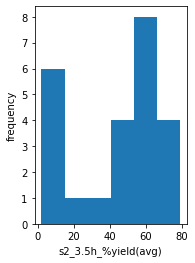

In [13]:
visualize_methods.build_hist(["s2_3.5h_%yield(avg)"])

A list of columns produces multiple plots

In [14]:
# visualize_methods.build_hist(["s2_1h_%yield", "s2_3.5h_%yield(avg)", "s2_21h_%yield"])

Or all of them: no parameters provides a plot for each column

In [15]:
# visualize_methods.build_hist()

## Univariate Regression Visualization

* if you don't add a list of columns, it will produce a plot for all columns
* if you don't specify y, it will be an n-dimensional zero vector.
* a list of columns produces multiple plots
* if you want all of the columns, don't specify cols, but explicitly specify y. 

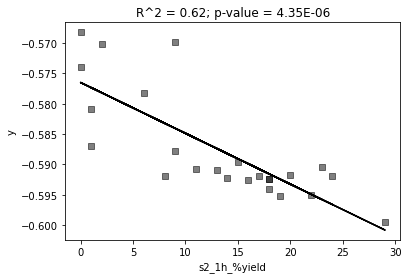

In [16]:
visualize_methods.build_univar(cols=["s2_1h_%yield"], y=my_dataframe["nbo_N_oxamide_max"])

Pass in a list of more than one x column name, along with a y column name (un-comment this line):

In [17]:
# visualize_methods.build_univar(cols=["s2_1h_%yield", "s2_21h_%yield"], y=my_dataframe["s2_3.5h_%yield(avg)"])

Pass in a y column, but no x column names (un-comment this line):

In [18]:
#visualize_methods.build_univar(y=my_dataframe["s2_3.5h_%yield(avg)"])

Pass in an x column name, but no y column name (un-comment this line):

In [19]:
#visualize_methods.build_univar(cols=["s2_1h_%yield"])

## Hist & Univariate Regression Plots (Side-by-Side)

You can pass in as many X columns as you want to compare, but only for one y column at a time.

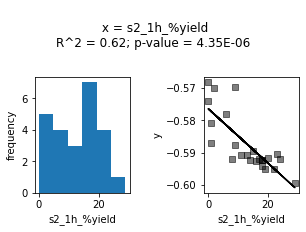

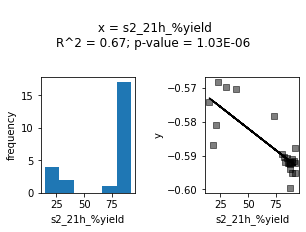

In [20]:
visualize_methods.show_hist_univar_pairs(cols=["s2_1h_%yield", "s2_21h_%yield"], y=my_dataframe["nbo_N_oxamide_max"])

## Bubble Plots

Similarly to the histogram and univariate regression plots, you can pass in more-than one x. 

In [21]:
my_dataframe.columns

Index(['s2_1h_%yield', 's2_3.5h_%yield(avg)', 's2_21h_%yield', 's4_1h_%yield',
       's4_3.5h_%yield(avg)', 's4_21h_%yield', 'virtual', 'nbo_N_oxamide_max',
       'nbo_aryl_sub_=O_max_max'],
      dtype='object')

Example for plotting a feature list with only one column

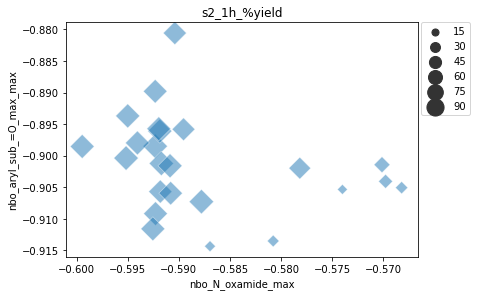

In [22]:
visualize_methods.build_bubble_plot(features = ['s2_1h_%yield'], bp_x = my_dataframe['nbo_N_oxamide_max'], bp_y = my_dataframe['nbo_aryl_sub_=O_max_max'], bp_size = my_dataframe['s2_21h_%yield'])

Example using multiple features

In [29]:
feature_list = [ 's2_21h_%yield', 's4_1h_%yield','nbo_N_oxamide_max']

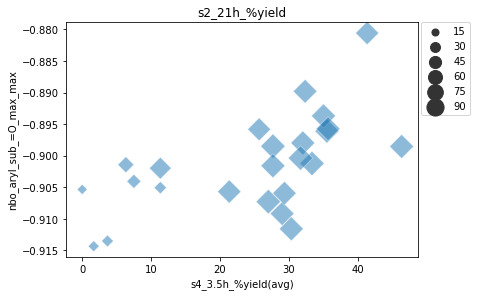

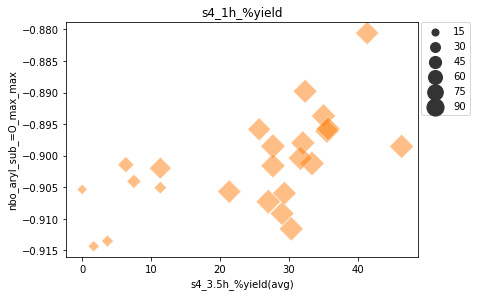

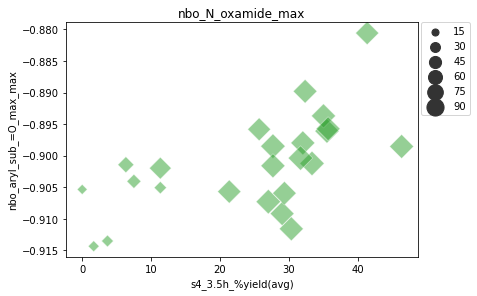

In [30]:
visualize_methods.build_bubble_plot(features = feature_list, bp_x = my_dataframe['s4_3.5h_%yield(avg)'], bp_y = my_dataframe['nbo_aryl_sub_=O_max_max'], bp_size = my_dataframe['s2_21h_%yield'])